In [ ]:
        import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)
import imblearn; print("Imbalanced-Learn", imblearn.__version__)


Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
NumPy 1.19.5
SciPy 1.4.1
Scikit-Learn 0.22.2.post1


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Imbalanced-Learn 0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [ ]:
#explore the dataset
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


# check for missing values and data types of the columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Explore label class

In [ ]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [ ]:
print('Normal transactions', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal transactions 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
# Count the occurrences of fraud and no fraud cases
LABELS = ["Normal", "Fraud"]
fnf = df["Class"].value_counts()

Text(0, 0.5, 'Number of Observations')

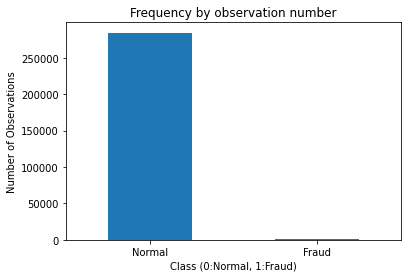

In [ ]:
# Plottingg your data
fnf.plot(kind = 'bar',title = 'Frequency by observation number',rot=0)
plt.xticks(range(2),LABELS)
plt.xlabel("Class (0:Normal, 1:Fraud)")
plt.ylabel("Number of Observations")

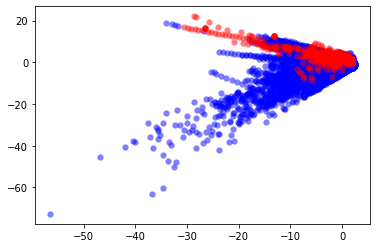

In [ ]:
# Plot how fraud and non-fraud cases are scattered 
plt.scatter(df.loc[df['Class'] == 0]['V1'], df.loc[df['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15,c='b')
plt.scatter(df.loc[df['Class'] == 1]['V1'], df.loc[df['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()


# Distribution of 2 Features : Time and Amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


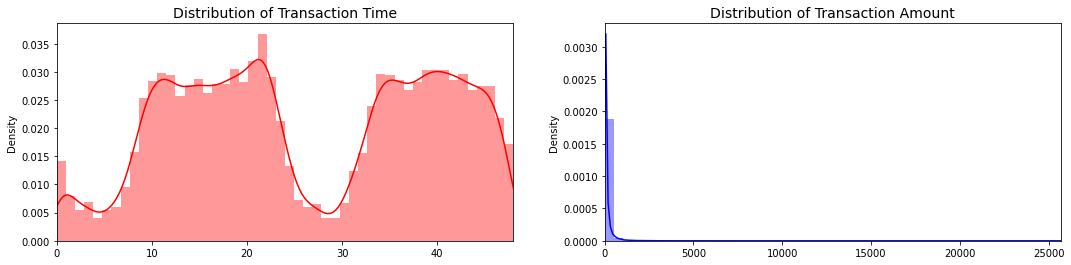

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

# Cut Up the Dataset into Two Datasets and Summarize



In [ ]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

# Compare the Amount of transactions in two separate datasets

In [ ]:
# Summarize statistics and see differences between fraud and normal transactions
print(df_nonfraud.Amount.describe())
print('_'*25)
print(df_fraud.Amount.describe())

# Import the module
from scipy import stats
F, p = stats.f_oneway(df['Amount'][df['Class'] == 0], df['Amount'][df['Class'] == 1])
print("F:", F)
print("p:",p)

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
F: 9.033344712018891
p: 0.0026512206498171095


# Transaction Amount Visualization

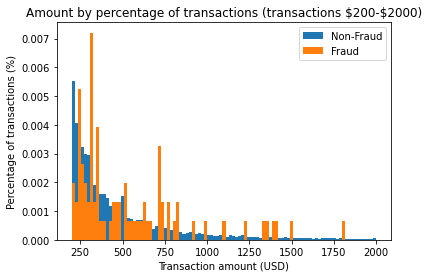

In [ ]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

# Transaction Hour

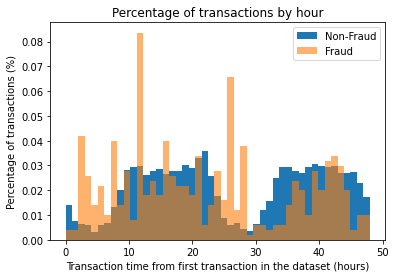

In [ ]:
# Plot of transactions in 48 hours
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

# Transaction Amount vs. Hour


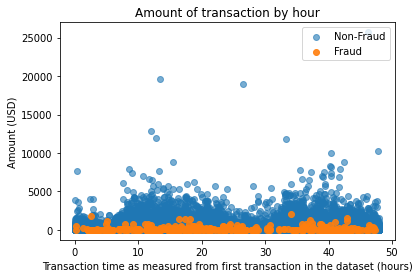

In [ ]:
# Plot of transactions in 48 hours
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

# Feature Scaling

In [ ]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


# Extract features from our scaled dataset "df_scaled"


In [ ]:
# Define the prep_data function to extrac features 
def prep_data(df):
    X = df.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = df[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(df_scaled)


# Resample data with RUS, ROS and SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline
from imblearn.metrics import classification_report_imbalanced

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Create the training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
X_train.shape,X_test.shape

((199364, 30), (85443, 30))

# Define the resampling method

In [ ]:
undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data

In [ ]:
X_undersam, y_undersam = undersam.fit_sample(X_train,y_train)
X_oversam, y_oversam = oversam.fit_sample(X_train,y_train)
X_smote, y_smote = smote.fit_sample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_sample(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

# Module 3: Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])


# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ROC AUC Score: 0.9693561724070607
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.999204147794436


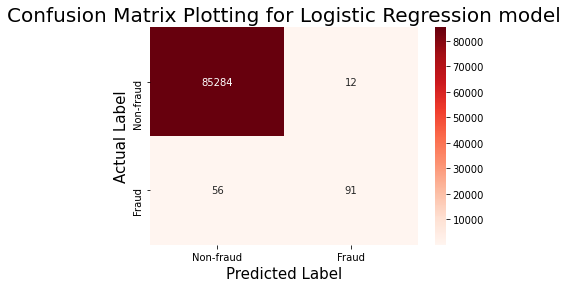

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted)
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Logistic Regression model", size = 20)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
    
# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
#print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print('accuracy :\n',accuracy_score(y_test,y_predicted))


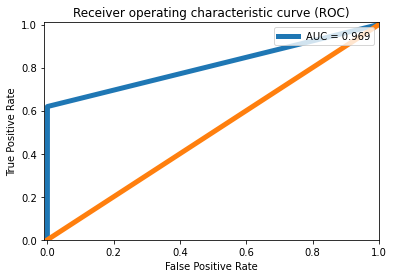

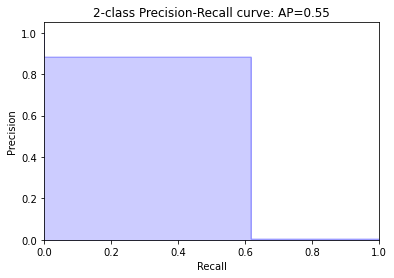

In [ ]:
# Plot the roc curve 
plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
plot_pr_curve(recall, precision, average_precision)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Transaction Number x_train dataset:  (199364, 30)
Transaction Number y_train dataset:  (199364, 1)
Transaction Number x_test dataset:  (85443, 30)
Transaction Number y_test dataset:  (85443, 1)
Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_x: (398038, 30)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


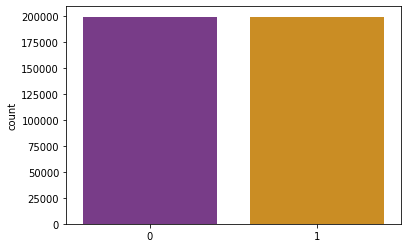

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)

print("Transaction Number x_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
#ROS
print('After OverSampling, the shape of train_x: {}'.format(X_train_ros.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ros.shape))
print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_ros==1)/len(y_train_ros)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_ros==0)/len(y_train_ros)*100.0,2))
sns.countplot(x=y_train_ros, data=df, palette='CMRmap')



#RUS

In [ ]:

print('After Sampling using undersample, the shape of train_x: {}'.format(X_train_rus.shape))
print('After Sampling using undersample, the shape of train_y: {} \n'.format(y_train_rus.shape))
print("After Sampling using undersample, counts of label '1', %: {}".format(sum(y_train_rus==1)/len(y_train_rus)*100.0,2))
print("After Sampling using undersample, counts of label '0', %: {}".format(sum(y_train_rus==0)/len(y_train_rus)*100.0,2))


After Sampling using undersample, the shape of train_x: (690, 30)
After Sampling using undersample, the shape of train_y: (690, 1) 

After Sampling using undersample, counts of label '1', %: [50.]
After Sampling using undersample, counts of label '0', %: [50.]


#SMOTE

After OverSampling using smomte, the shape of train_x: (398038, 30)
After OverSampling using smomte, the shape of train_y: (398038,) 

After OverSampling using smomte, counts of label '1', %: 50.0
After OverSampling using smomte, counts of label '0', %: 50.0


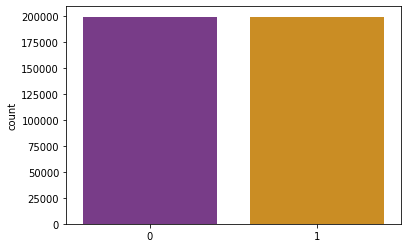

In [ ]:

print('After OverSampling using smomte, the shape of train_x: {}'.format(X_train_smote.shape))
print('After OverSampling using smomte, the shape of train_y: {} \n'.format(y_train_smote.shape))
print("After OverSampling using smomte, counts of label '1', %: {}".format(sum(y_train_smote==1)/len(y_train_smote)*100.0,2))
print("After OverSampling using smomte, counts of label '0', %: {}".format(sum(y_train_smote==0)/len(y_train_smote)*100.0,2))
sns.countplot(x=y_train_smote, data=df, palette='CMRmap')



# Logistic Regression with Resampled Data

In [ ]:

# Fit a logistic regression model to our data
rus_model = LogisticRegression().fit(X_train_rus, y_train_rus)
ros_model = LogisticRegression().fit(X_train_ros, y_train_ros)
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
blsmote_model = LogisticRegression().fit(X_train_blsmote, y_train_blsmote)

y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)

print('')
print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('accuracyy :\n',accuracy_score(y_test,y_rus))

print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('accuracyy :\n',accuracy_score(y_test,y_ros))

print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('accuracyy :\n',accuracy_score(y_test,y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_blsmote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_blsmote))
print('accuracyy :\n',accuracy_score(y_test,y_blsmote))
print('*'*25)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.05      0.91      0.09       147

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix:
 [[82578  2718]
 [   13   134]]
accuracyy :
 0.9680371709794834
*************************
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.93      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83382  1914]
 [   11   136]]
accuracyy :
 0.9774703603571971
*************************
Classifcation report:
               precision    recall  f1-score   support

     

# Module 4: Decision Tree Classifier


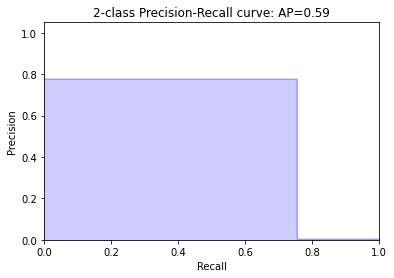

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.76      0.77       147

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85264    32]
 [   36   111]]
accuracy :
 0.999204147794436


In [ ]:
# Import the decision tree model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print('accuracy :\n',accuracy_score(y_test,y_predicted))


#Decision Tree with RUS

In [ ]:
rus_model = DecisionTreeClassifier().fit(X_train_rus, y_train_rus)
y_rus = rus_model.predict(X_test)
print('')
print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('accuracyy :\n',accuracy_score(y_test,y_rus))



Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85296
           1       0.02      0.93      0.04       147

    accuracy                           0.92     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.92      0.96     85443

Confusion matrix:
 [[78518  6778]
 [   10   137]]
accuracyy :
 0.92055522395047


#Decision Tree with ROS

In [ ]:
ros_model = DecisionTreeClassifier().fit(X_train_ros, y_train_ros)
y_ros = ros_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('accuracyy :\n',accuracy_score(y_test,y_ros))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.76      0.79       147

    accuracy                           1.00     85443
   macro avg       0.91      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85270    26]
 [   35   112]]
accuracyy :
 0.9992860737567735


#Decision Tree with SMOTE

In [ ]:
smote_model = DecisionTreeClassifier().fit(X_train_smote, y_train_smote)
y_smote = smote_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('accuracyy :\n',accuracy_score(y_test,y_smote))


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.41      0.76      0.53       147

    accuracy                           1.00     85443
   macro avg       0.71      0.88      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85136   160]
 [   35   112]]
accuracyy :
 0.9977177767634563


# Decision Tree Classifier with BLSMOTE Data

In [ ]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train,y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))
print('accuracyy :\n',accuracy_score(y_test,y_predicted))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.59      0.71      0.64       147

    accuracy                           1.00     85443
   macro avg       0.80      0.85      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85224    72]
 [   43   104]]
accuracyy :
 0.9986540734758845


# Module 5: Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


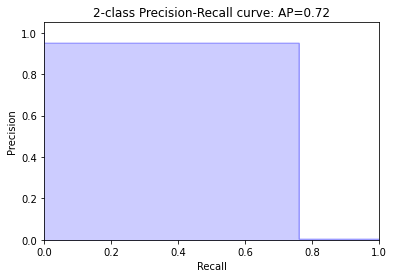

0.9995201479348805
AUC ROC score:  0.9337809382803957
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85290     6]
 [   35   112]]
accuracyy :
 0.9995201479348805


In [ ]:
# Import the Random Forest Classifier model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Calculate average precision 
average_precision = average_precision_score(y_test, y_predicted)

# Obtain precision and recall 
precision, recall, _ = precision_recall_curve(y_test, y_predicted)

# Plot the recall precision tradeoff
plot_pr_curve(recall, precision, average_precision)

# Print the classifcation report and confusion matrix
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))

print('Classification report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_predicted))
print('accuracyy :\n',accuracy_score(y_test,y_predicted))


#Random Forest Classifier with RUS 

In [ ]:
rus_model = RandomForestClassifier().fit(X_train_rus, y_train_rus)
y_rus = rus_model.predict(X_test)
print('')
print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('accuracyy :\n',accuracy_score(y_test,y_rus))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.



Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.90      0.13       147

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83604  1692]
 [   15   132]]
accuracyy :
 0.980021768898564


#Random Forest Classifier with ROS

In [ ]:
ros_model = RandomForestClassifier().fit(X_train_ros, y_train_ros)
y_ros = ros_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('accuracyy :\n',accuracy_score(y_test,y_ros))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.78      0.86       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     7]
 [   32   115]]
accuracyy :
 0.9995435553526912


#Random Forest Classifier with SMOTE 

In [ ]:
smote_model = RandomForestClassifier().fit(X_train_smote, y_train_smote)
y_smote = smote_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('accuracyy :\n',accuracy_score(y_test,y_smote))


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.82      0.87       147

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85287     9]
 [   27   120]]
accuracyy :
 0.9995786664794073


# Random Forest Classifier with BLSMOTE Data Catch Fraud

In [ ]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))
print('accuracy :\n',accuracy_score(y_test,y_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

0.9994850368081645
AUC ROC score:  0.9556218074361614
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.79      0.84       147

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85283    13]
 [   31   116]]
accuracy :
 0.9994850368081645


# Module 7: KMeans Clustering



## Prepare unlabeled train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset
features_train = normalize(features_train)
features_test = normalize(features_test)

# Build the model

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


labels_test_predicted = 1- labels_test_predicted

True


# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))

Confusion Matrix:
 [[67803 17493]
 [   56    91]]
kmeans_precison_score: 0.0051751592356687895
kmeans_recall_score: 0.6190476190476191
kmeans_accuracy_score: 0.7946116124199759
kmeans_f1_score: 0.010264508487958941


#K-Mean with RUS 

In [ ]:
rus_model = KMeans(n_clusters=2).fit(X_train_rus, y_train_rus)
y_rus = rus_model.predict(X_test)
print('')
print('Classifcation report:\n', classification_report(y_test, y_rus))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_rus))
print('accuracyy :\n',accuracy_score(y_test,y_rus))



Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.31      0.46       147

    accuracy                           1.00     85443
   macro avg       0.92      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85287     9]
 [  101    46]]
accuracyy :
 0.9987125920204113


#K-Mean with ROS

In [ ]:
ros_model = KMeans(n_clusters=2).fit(X_train_ros, y_train_ros)
y_ros = ros_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('accuracyy :\n',accuracy_score(y_test,y_ros))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.31      0.46       147

    accuracy                           1.00     85443
   macro avg       0.92      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85287     9]
 [  101    46]]
accuracyy :
 0.9987125920204113


#K-Mean with SMOTE

In [ ]:
smote_model = KMeans(n_clusters=2).fit(X_train_smote, y_train_smote)
y_smote = smote_model.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('accuracyy :\n',accuracy_score(y_test,y_smote))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.31      0.46       147

    accuracy                           1.00     85443
   macro avg       0.92      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85287     9]
 [  101    46]]
accuracyy :
 0.9987125920204113


# Module 8: MiniBatchKMeans Clustering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Time','Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Time','Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset
features_train = normalize(features_train)
features_test = normalize(features_test)
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix

model = MiniBatchKMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


False


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))


Confusion Matrix:
 [[67837 17459]
 [   56    91]]
kmeans_precison_score: 0.005185185185185185
kmeans_recall_score: 0.6190476190476191
kmeans_accuracy_score: 0.7950095385227579
kmeans_f1_score: 0.01028422896536136


# NEURAL NETWORK 

In [ ]:
#Using neural networks 
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras import Sequential
from keras.models import  Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [ ]:
classifier = Sequential([
    Dense(units =16,input_dim=30,activation='relu'),
    Dense(units =24,activation='relu'),
    Dense(units =20,activation='relu'),
    Dropout(0.5),
    Dense(units =21,activation='relu'),
    Dense(units =24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 21)                441       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2

#Training

In [ ]:
y_train.shape

(199364, 1)

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(X_train,y_train,batch_size=30,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
6646/6646 [==============================] - 14s 2ms/step - loss: 0.0365 - accuracy: 0.9945 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 2/5
6646/6646 [==============================] - 12s 2ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 3/5
6646/6646 [==============================] - 12s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 4/5
6646/6646 [==============================] - 12s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 5/5
6646/6646 [==============================] - 12s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0046 - val_accuracy: 0.9994


In [ ]:
score = classifier.evaluate(X_test,y_test)

2671/2671 [==============================] - 3s 940us/step - loss: 0.0046 - accuracy: 0.9994


In [ ]:
print(score)

[0.004594001453369856, 0.9993680119514465]


In [ ]:
y_predicted = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network')

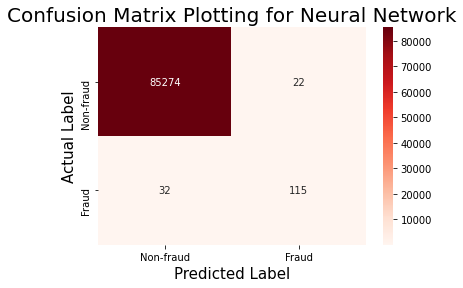

In [ ]:
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted.round())
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Neural Network", size = 20)

In [ ]:
print('Classification report:\n', classification_report(y_test, y_predicted.round()))
print('accuracy :\n',accuracy_score(y_test,y_predicted.round()))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.78      0.81       147

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.9993679997191109


0.9590339746853535


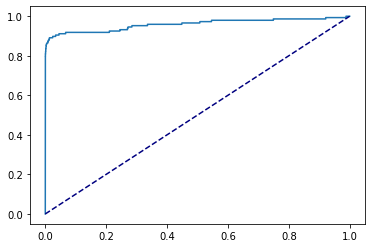

In [ ]:

print(roc_auc_score(y_test, y_predicted))

fpr, tpr, thresholds = roc_curve(y_test,y_predicted)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#Neural Network Using RUS

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(X_train_rus,y_train_rus,batch_size=30,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
23/23 [==============================] - 3s 112ms/step - loss: 9.4269e-05 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9982
Epoch 2/5
23/23 [==============================] - 2s 103ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9980
Epoch 3/5
23/23 [==============================] - 2s 103ms/step - loss: 0.0046 - accuracy: 0.9976 - val_loss: 0.0231 - val_accuracy: 0.9980
Epoch 4/5
23/23 [==============================] - 2s 104ms/step - loss: 5.8027e-06 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9981
Epoch 5/5
23/23 [==============================] - 2s 106ms/step - loss: 5.0894e-06 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9981


In [ ]:
score = classifier.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 2s 923us/step - loss: 0.0249 - accuracy: 0.9981
[0.024900920689105988, 0.9980571866035461]


In [ ]:
y_predicted_rus = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network')

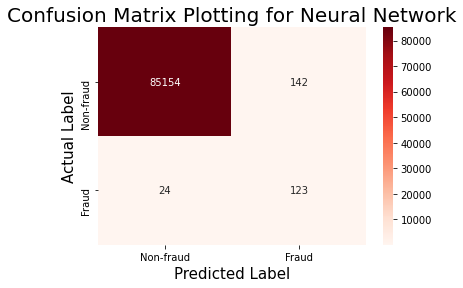

In [ ]:
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted_rus.round())
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Neural Network", size = 20)

In [ ]:
print('Classification report:\n', classification_report(y_test, y_predicted_rus.round()))
print('accuracy :\n',accuracy_score(y_test,y_predicted_rus.round()))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.46      0.84      0.60       147

    accuracy                           1.00     85443
   macro avg       0.73      0.92      0.80     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.9980571843217115


0.9586003905407596


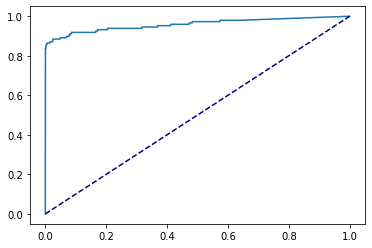

In [ ]:

print(roc_auc_score(y_test, y_predicted_rus))

fpr, tpr, thresholds = roc_curve(y_test,y_predicted_rus)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#Neural Network using ROS

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(X_train_ros,y_train_ros,batch_size=30,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0156 - val_accuracy: 0.9981
Epoch 2/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0174 - val_accuracy: 0.9988
Epoch 3/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0184 - val_accuracy: 0.9989
Epoch 4/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0171 - val_accuracy: 0.9985
Epoch 5/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0146 - val_accuracy: 0.9987


In [ ]:
score = classifier.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 3s 948us/step - loss: 0.0146 - accuracy: 0.9987
[0.014600381255149841, 0.9987360239028931]


In [ ]:
y_predicted_ros = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network')

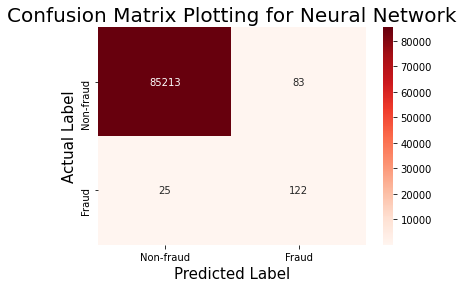

In [ ]:
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted_ros.round())
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Neural Network", size = 20)

In [ ]:
print('Classification report:\n', classification_report(y_test, y_predicted_ros.round()))
print('accuracy :\n',accuracy_score(y_test,y_predicted_ros.round()))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.60      0.83      0.69       147

    accuracy                           1.00     85443
   macro avg       0.80      0.91      0.85     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.998735999438222


0.9586003905407596


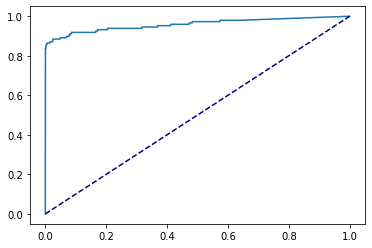

In [ ]:

print(roc_auc_score(y_test, y_predicted_ros))

fpr, tpr, thresholds = roc_curve(y_test,y_predicted_ros)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#Neural Network using SMOTE

In [ ]:
classifier = Sequential([
    Dense(units =16,input_dim=30,activation='relu'),
    Dense(units =24,activation='relu'),
    Dense(units =20,activation='relu'),
    Dropout(0.5),
    Dense(units =21,activation='relu'),
    Dense(units =24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 21)                441       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(X_train_smote,y_train_smote,batch_size=30,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
13268/13268 [==============================] - 24s 2ms/step - loss: 0.0771 - accuracy: 0.9680 - val_loss: 0.0231 - val_accuracy: 0.9946
Epoch 2/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.0167 - val_accuracy: 0.9976
Epoch 3/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0208 - val_accuracy: 0.9970
Epoch 4/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0210 - val_accuracy: 0.9978
Epoch 5/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0164 - val_accuracy: 0.9979


In [ ]:
score = classifier.evaluate(X_test,y_test)

2671/2671 [==============================] - 2s 904us/step - loss: 0.0164 - accuracy: 0.9979


In [ ]:
print(score)

[0.01635276898741722, 0.9978582262992859]


In [ ]:
y_predicted_smote = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network')

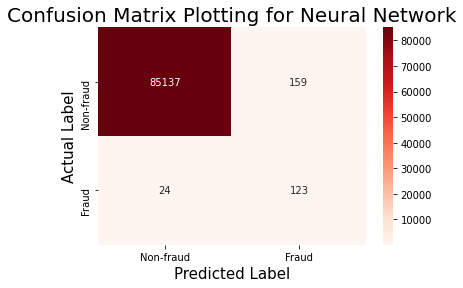

In [ ]:
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted_smote.round())
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Neural Network", size = 20)

In [ ]:
print('Classification report:\n', classification_report(y_test, y_predicted_smote.round()))
print('accuracy :\n',accuracy_score(y_test,y_predicted_smote.round()))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.44      0.84      0.57       147

    accuracy                           1.00     85443
   macro avg       0.72      0.92      0.79     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.9978582212703205


0.9577788018227362


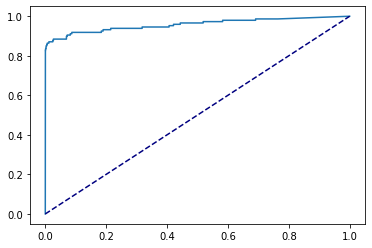

In [ ]:
print(roc_auc_score(y_test, y_predicted_smote))

fpr, tpr, thresholds = roc_curve(y_test,y_predicted_smote)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#Neural Network with BLSMOTE

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=classifier.fit(X_train_blsmote,y_train_blsmote,batch_size=30,epochs=5,validation_data = (X_test,y_test))

Epoch 1/5
13268/13268 [==============================] - 24s 2ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0140 - val_accuracy: 0.9982
Epoch 2/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0142 - val_accuracy: 0.9984
Epoch 3/5
13268/13268 [==============================] - 24s 2ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 4/5
13268/13268 [==============================] - 24s 2ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0107 - val_accuracy: 0.9991
Epoch 5/5
13268/13268 [==============================] - 23s 2ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0121 - val_accuracy: 0.9988


In [ ]:
score = classifier.evaluate(X_test,y_test)
print(score)

2671/2671 [==============================] - 2s 922us/step - loss: 0.0121 - accuracy: 0.9988
[0.012089733965694904, 0.9988179206848145]


In [ ]:
y_predicted_blsmote = classifier.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix Plotting for Neural Network')

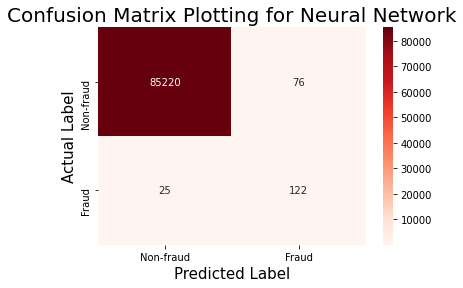

In [ ]:
cnf_matrix = confusion_matrix(y_true = y_test, y_pred = y_predicted_blsmote.round())
labels = ['Non-fraud', 'Fraud']
sns.heatmap(pd.DataFrame(cnf_matrix),xticklabels = labels, yticklabels = labels, annot=True, cmap="Reds", fmt='g')
plt.ylabel('Actual Label',size = 15)
plt.xlabel('Predicted Label',size = 15)
plt.title("Confusion Matrix Plotting for Neural Network", size = 20)

In [ ]:
print('Classification report:\n', classification_report(y_test, y_predicted_blsmote.round()))
print('accuracy :\n',accuracy_score(y_test,y_predicted_blsmote.round()))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.62      0.83      0.71       147

    accuracy                           1.00     85443
   macro avg       0.81      0.91      0.85     85443
weighted avg       1.00      1.00      1.00     85443

accuracy :
 0.9988179254005595


0.9631413599955083


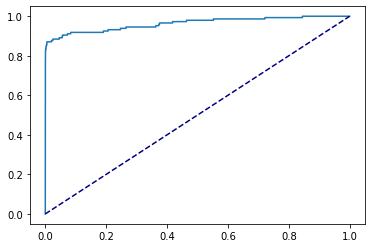

In [ ]:
print(roc_auc_score(y_test, y_predicted_blsmote))

fpr, tpr, thresholds = roc_curve(y_test,y_predicted_blsmote)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

# naive bayes

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
Model = GaussianNB()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83480  1816]
 [   24   123]]
accuracy is 0.9784651756141521


#Naive Bayes with RUS

In [ ]:
Model = GaussianNB()
Model.fit(X_train_rus, y_train_rus)
y_pred_rus = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_rus))
print(confusion_matrix(y_test, y_pred_rus))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_rus,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.84      0.10       147

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83215  2081]
 [   24   123]]
accuracy is 0.9753636927542338


#Naive Bayes with ROS

In [ ]:
Model = GaussianNB()
Model.fit(X_train_ros, y_train_ros)
y_pred_ros = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_ros))
print(confusion_matrix(y_test, y_pred_ros))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_ros,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.86      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.97      0.99     85443

[[83130  2166]
 [   20   127]]
accuracy is 0.9744156923329003


# naive bayes smote

In [ ]:
Model = GaussianNB()
Model.fit(X_train_smote, y_train_smote)
y_pred_smote = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_smote,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.86      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83219  2077]
 [   21   126]]
accuracy is 0.9754456187165713


#Naive Bayes with BLSMOTE

In [ ]:
Model = GaussianNB()
Model.fit(X_train_blsmote, y_train_blsmote)
y_pred_blsmote = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_blsmote))
print(confusion_matrix(y_test, y_pred_blsmote))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_blsmote,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.87      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.96      0.98     85443

[[82280  3016]
 [   19   128]]
accuracy is 0.9644792434722563


# support vector machine

In [ ]:

Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.69      0.80       147

    accuracy                           1.00     85443
   macro avg       0.98      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     5]
 [   46   101]]
accuracy is 0.999403110845827


#Support Vector with RUS

In [ ]:

Model = SVC()
Model.fit(X_train_rus, y_train_rus)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.14      0.86      0.24       147

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443

[[84491   805]
 [   20   127]]
accuracy is 0.9903444401530845


#Support Vector with ROS

In [ ]:

Model = SVC()
Model.fit(X_train_ros, y_train_ros)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.14      0.88      0.23       147

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443

[[84472   824]
 [   18   129]]
accuracy is 0.9901454771016935


#Support Vector using SMOTE

In [ ]:

Model = SVC()
Model.fit(X_train_smote, y_train_smote)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.10      0.87      0.18       147

    accuracy                           0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.00      0.99      0.99     85443

[[84174  1122]
 [   19   128]]
accuracy is 0.9866460681389932


#SVM with BLSMOTE

In [ ]:
Model = SVC()
Model.fit(X_train_blsmote, y_train_blsmote)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.23      0.69      0.34       147

    accuracy                           1.00     85443
   macro avg       0.61      0.84      0.67     85443
weighted avg       1.00      1.00      1.00     85443

[[84957   339]
 [   46   101]]
accuracy is 0.9954940720714395


# Autoencoder 

In [ ]:
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
input_dim = 30
encoding_dim = 14

In [ ]:
input_layer = Input(shape=(input_dim))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)


NameError: ignored

In [ ]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs = 50, batch_size=16,
validation_data=(X_test,X_test)).history

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label = 'CV Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


In [ ]:
predictions = autoencoder.predict(X_test)

In [ ]:
mse = np.mean(np.power(X_test - predictions,2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test.ravel()}) 

In [ ]:
without_fraud = error[error.actual_class==0]
with_fraud = error[error.actual_class==1]

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(without_fraud["reconstruction_error"])
plt.title("Reconstruction error without fraud")

plt.subplot(1,2,2)
sns.distplot(with_fraud["reconstruction_error"])
plt.title("Reconstruction error with fraud")

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]
print('Confusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))